# Project 1 - Introduction to Image & Video Processing
##### Diogo Rio, i6265026 - Spring 2022

### Task 1 - Color Spaces
##### 1. RGB to HSV
Firstly, we'll be using the OpenCV library to perform the transformation on two different color sets - **pale** vs **brightly colored images.**

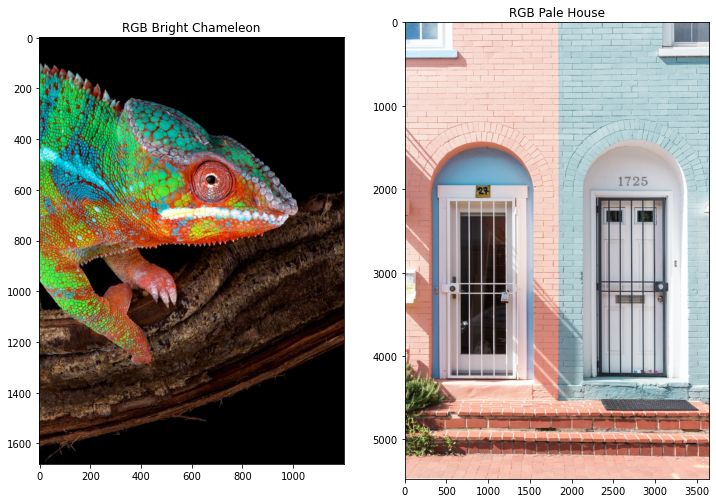

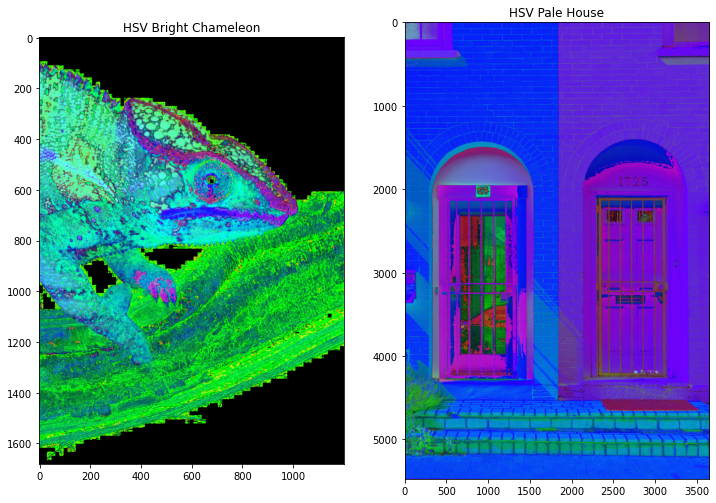

In [17]:
from matplotlib import pyplot as plt
import cv2

# Function: Hide the output label(s)
def hide_labels(axis):
    for i in range(len(axis)):
        axis[i].plot() 

# Function: Perform the desired plot build, both in regular-scale or grayscale
def build_plot(img1, str1, img2, str2):
    fig, ax = plt.subplots(1,2, figsize=(12,12))
    ax[0].imshow(img1)
    ax[0].set_title(str1)
    ax[1].imshow(img2)
    ax[1].set_title(str2)
    hide_labels(ax)
    
def build_gs_plot(img1, str1, img2, str2):
    fig, ax = plt.subplots(1,2, figsize=(12,12))
    ax[0].imshow(img1, cmap='gray')
    ax[0].set_title(str1)
    ax[1].imshow(img2, cmap='gray')
    ax[1].set_title(str2)
    hide_labels(ax)

# Load images
bright_img = cv2.imread('personal_imgs/bright_chameleon.jpg')
pale_img = cv2.imread('personal_imgs/pale_house.jpg')

# Since pyplot serves the purpose of displaying the images in the notebook;
# and it works under the RGB format, we have to change the images read by the cv2 library
# (which are read in the BGR format (reversed from RGB), meaning the components of Red and Blue 
# are switched - resulting in Blue occupying the most significant area).
# Thus, there's a need to change it to the expected RGB format. This is why we include:
rgb_bright_img = cv2.cvtColor(bright_img, cv2.COLOR_BGR2RGB)
rgb_pale_img = cv2.cvtColor(pale_img, cv2.COLOR_BGR2RGB)

# Now that we have them in RGB format - we can procede with the transformation to HSV
hsv_bright_img = cv2.cvtColor(rgb_bright_img, cv2.COLOR_RGB2HSV)
hsv_pale_img = cv2.cvtColor(rgb_pale_img, cv2.COLOR_RGB2HSV)

# Display images in plots side by side
build_plot(rgb_bright_img, 'RGB Bright Chameleon', rgb_pale_img, 'RGB Pale House')

build_plot(hsv_bright_img, 'HSV Bright Chameleon', hsv_pale_img, 'HSV Pale House')

The transformation pertains RGB images and the result in their corresponding HSV format.

**NOTE:** in the following descriptions, a *bigger presence* of a certain component means a **clearer/whiter** color when we extract them - using e.g. *r = x(:,:,0); g = x(:,:,1); b = x(:,:,2);* - under the B&W tone image. A *smaller presence* would result in **darker colors** under each color channel extraction. If we then colored each image with its corresponding component color and merge them, the RGB image surges, by addition.

In the **RGB bright image**, by **extracting** each color channel, we can conclude the **red** component is very prevalent on the equator line of the image, under the chameleon's body. The branch itself does have a bigger presence of red (when compared to the other two components), even if much less than the part of the chameleon just described. It's quite simple to see in this image where each component is more present in the chameleon's body - there's only a grayish area for both **green** and **blue** components on top of the chameleon's head. The background however is pitch black, which means no component is there present at all, in the B&W extraction, all would have it as it's shown - pitch black.

In the **RGB pale image**, the **green** component is mostly prevalent on the bottom plant, whiter there (when compared to the other components, since they have it black) and lightly gray on the right wall - as much (little) gray as the **blue** component (since they're both intense). It's much grayer on the **red** component channel. The left wall however, is extremely white on the **red** component, while the other components share equally medium (grayish) intensities. The **white zones** are just like that in the extraction, since all components share **equally high intensities** there. 

##### 2. 'I' and 'V' Imaging Transformation

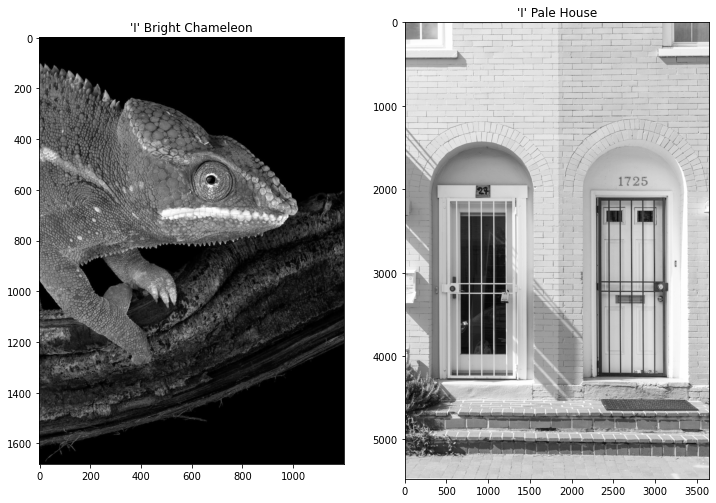

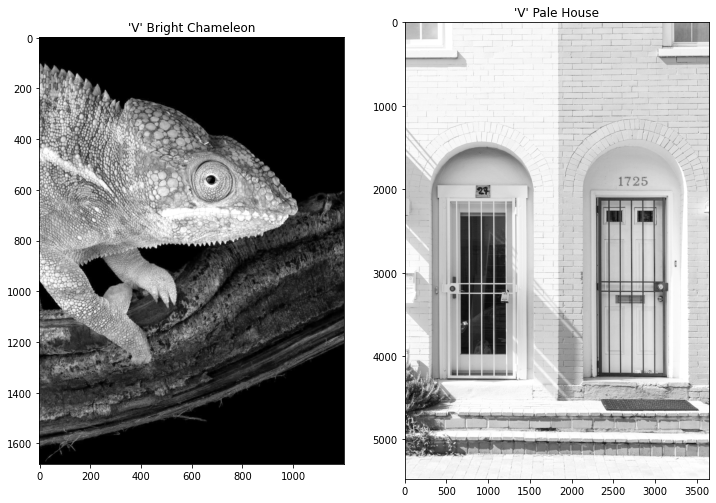

In [18]:
import numpy as np

# Function: Extract color component channels from RGB
def extract_channels(rgb_img):
    # Perform normalization from the 255-range (to 0.0 - 1.0, to be used next)
    new_img = np.float32(rgb_img)/255
    R_channel = new_img[:,:,0]
    G_channel = new_img[:,:,1]
    B_channel = new_img[:,:,2]
    
    return R_channel, G_channel, B_channel

# Function: Transform RGB into a 'V' image in HSV space
def transform_v(rgb_img):
    R, G, B = extract_channels(rgb_img)
    
    # Apply into value (in HSV) formula
    value = np.maximum(np.maximum(R, G), B) # Essentially the max, yet manual
    
    return value
    
    
# Function: Transform RGB into an 'I' image in HSI space
def transform_i(rgb_img):
    R, G, B = extract_channels(rgb_img)
    
    # Apply into intensity (in HSI) formula
    intensity = np.divide(R+G+B, 3) # Essentially, the mean, yet manual
    
    return intensity

# Perform required transformations
i_bright_img = transform_i(rgb_bright_img)
v_bright_img = transform_v(rgb_bright_img)
i_pale_img = transform_i(rgb_pale_img)
v_pale_img = transform_v(rgb_pale_img)

# Display images in plots side by side - grayscale
build_gs_plot(i_bright_img, "'I' Bright Chameleon", i_pale_img, "'I' Pale House")

build_gs_plot(v_bright_img, "'V' Bright Chameleon", v_pale_img, "'V' Pale House")

In both images, **isolating** these values (**value and intensity**) allows us to perceive image differences more easily. It's possible to tell when a color is bright comparatively, as we can differentiate colors more easily in the chameleon picture, rather than in the house one. If there was even more paleness, understanding where different colors start would be even harder, if we don't get to see the actual colors. This is the power of this process.

Now, besides the already shown mathematical difference between **V** and **I** imaging, there's also a perceptual difference concluded from observing the images above: the **'V' imaging** favors whiter displays to tell that an image is brighter. At those pixels, the value gets closer to 1.0 and it's still possible to differentiate. Images that are more pale, don't get values as high, and it gets very difficult to tell between colors. 

The situation with the **'I' imaging** is rather similar. However, it results in higher intensities within medium gray colors, which is possible to verify. The pale picture gets towards the whiter side and blacked simultaneously (with the tree). These are the vertices of the double-hexagonal model. The relevant brightness (or intensity, since brightness is so subjective to measure) of the chameleon is told by the medium grayness it has.

### Task 2 - Pointwise Transforms + Histogram Equalization
##### 1. Find Histograms
Initially, we'll be finding the **histogram** of these two images opposing **low vs high** contrast.

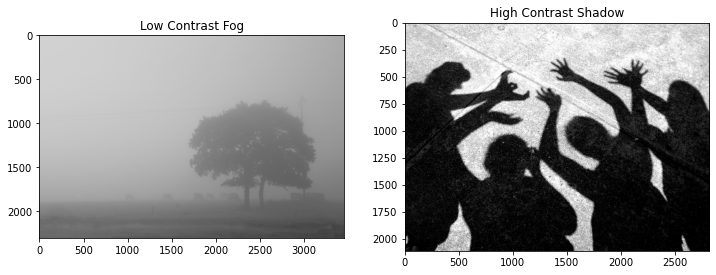

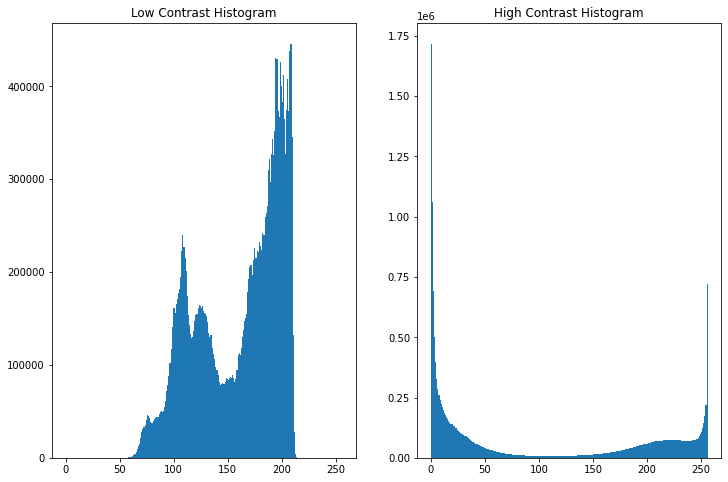

In [19]:
# Function: Build histogram using np's hist() function
# Since the images are not normalized, we will use the [0,256] range
def build_hist(img1, str1, img2, str2):
    fig, ax = plt.subplots(1,2, figsize=(12,8))
    ax[0].hist(img1.ravel(), 256, [0,256])
    ax[0].set_title(str1)
    ax[1].hist(img2.ravel(), 256, [0,256])
    ax[1].set_title(str2)
    hide_labels(ax)

# Load images
low_img = cv2.imread('sample_imgs/fog.jpg')
high_img = cv2.imread('sample_imgs/shadows.jpg')

# As explained in the previous task, we need to make this BGR to RGB conversion
rgb_low_img = cv2.cvtColor(low_img, cv2.COLOR_BGR2RGB)
rgb_high_img = cv2.cvtColor(high_img, cv2.COLOR_BGR2RGB)

# Display images
build_plot(rgb_low_img, "Low Contrast Fog", rgb_high_img, "High Contrast Shadow")

# Create the histograms of both images
build_hist(rgb_low_img, "Low Contrast Histogram", rgb_high_img, "High Contrast Histogram")

As seen through the histograms, we can conclude that for the **low contrast** image, the presence of the darkest of pixels (around x=0) is non-existent. The same is happening on the other end of the spectrum, with the whitest (around x=256) being unnoticeable. Since this is a grayscale image, the middle-point values obtained tell us that there are many tones of gray within the image's pixels, which means differentiating between colors will be harder, since they are very prevalent within a slim range, approximately from 65 to 210. This corroborates the low contrast.

For the **high constrast** image, the situation clearly flips, as we see two main frequencies of pixels, on both ends of the spectrum. Pixels concentrate on the darkest side (around x=0) and on the whitest side (x=256). This results in an image easy to delimit, color-wise, since it is simpler to differentiate one when the most prevalent colors are this far away in the histogram.

##### 2. Negative Pointwise Transform
The **negative transform** method states that in order to obtain the corresponding negative of a color component (R, G, B, etc.), we have to apply a sum of 255 to the negative matrix of the color component we want to negate. Since this is pointwise (and the image is grayscaled), we run this idea on all points (i.e. the entire image).

In practicality, a reflection of all points occurs within the range we're using (0 to 256) when we run this transform.

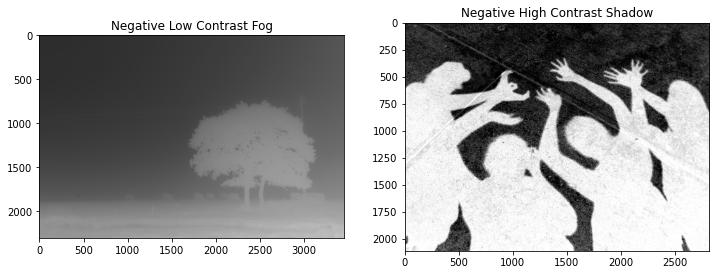

In [20]:
# Perform the Neg-PW Transform
neg_low_img = 255 - rgb_low_img
neg_high_img = 255 - rgb_high_img

# Display the transformed images
build_plot(neg_low_img, "Negative Low Contrast Fog", neg_high_img, "Negative High Contrast Shadow")

##### 3. 'Negative' Image Histograms

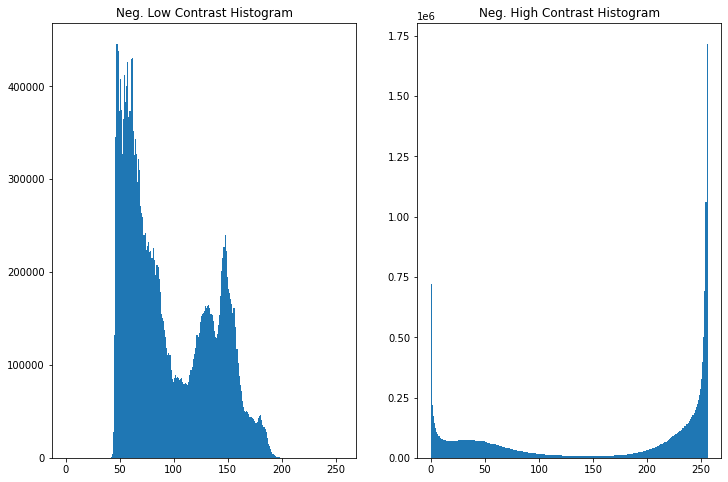

In [21]:
# Create the histograms of the newly created 'negative' images
build_hist(neg_low_img, "Neg. Low Contrast Histogram", neg_high_img, "Neg. High Contrast Histogram")

As we can see, the mentioned **reflection** is indeed observable in these new histograms. 

In both images, it's possible to see that (obviously) the quantity of pixels remained equal, however, they assumed different (opposing) values in the spectrum. The **high contrast** image is especially clear, since we can see which color most points (pixels) had before, black, and they became white. For high contrast images, the negative transform is not always significantly useful, since it was already simple to discriminate between colors previously..

However, for **low contrast** images, those transforms can be useful, depending on the nature of the analysis we might want to run on a certain image.

##### 4. Power Law Pointwise Transform + Convert Low to High Contrast 
By using the power law pointwise transform, it is possible to transform an image into its opposing contrast style, as seen below.  

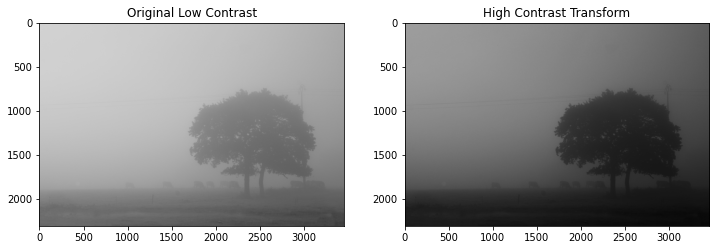

In [22]:
# Function: Power Transform an Image
def power_transform(img, n):
    new_img = np.float32(img)/255 # Normalize within [0.0,1.0]
    new_img = np.power(new_img, n)

    return new_img

# Transform low contrast image, n is provided as the last parameter
power_low_img = power_transform(rgb_low_img, 2.5) # n > 1.0 potentiates contrast, the contrary occurs for n < 1.0

# Display original vs transformed image
build_plot(rgb_low_img, "Original Low Contrast", power_low_img, "High Contrast Transform") 

The 'n' behaves as the **gamma coefficient** and it allows an image to gain more contrast (when n > 1.0) since it enhances differences. If we analyze the histogram, we can see values get further away, which allows contrast to be noticeable. 

This happens, given the way powering a number (by a value n > 1.0) **potentiates bigger growth on larger values** and **sustains the growth on smaller values**, comparatively, which results in the **spacing** we can see in the histogram. This behaviour translates into a newly created higher contrast image.

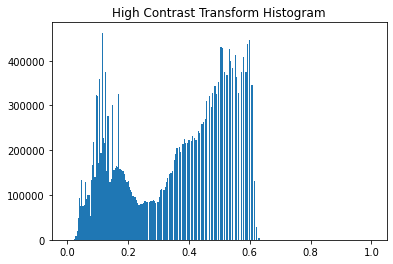

In [23]:
# Create histogram to help with explaining methodology
plt.hist(power_low_img.ravel(), 256, [0.0,1.0]) # New range, since values were normalized in the power_transform() function
plt.title("High Contrast Transform Histogram")
plt.show()

### Task 3 - Special Effects (FX)

##### 1. Polar Coordinates

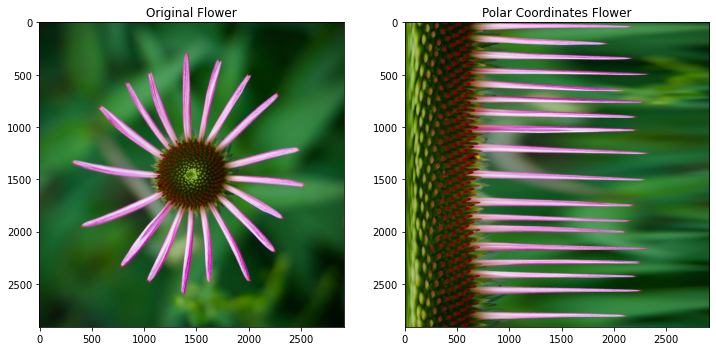

In [24]:
# Function: Polarize a provided image
def get_polar(img):
    new_img = np.float32(img)/255 # Normalization
    
    center = (new_img.shape[0]/2, new_img.shape[1]/2) # Define the image's center to polarize: half of the height and width 
    max_rad = new_img.shape[0]/2 # Define an appropriate radius for the image to assume: half of the height
    
    polar_img = cv2.linearPolar(new_img, center, max_rad, None)
    
    return polar_img

# Load image and make required conversion for visualization
fx_img = cv2.imread('new_imgs/flower.jpeg')
rgb_fx_img = cv2.cvtColor(fx_img, cv2.COLOR_BGR2RGB)

# Transform a cartesian into a polar representation using cv2's function
polar_fx_img = get_polar(rgb_fx_img)

# Display images
build_plot(rgb_fx_img, "Original Flower", polar_fx_img, "Polar Coordinates Flower")

What is happening in this conversion is, first of all, clearly portrayed given the position of the circular feature on the original image. It is located right in the **center** of the picture, which results in a simple call from the parameter perspective. 
Besides, half of the height, as a maximum value for the radius, results in a clear display, since it is just enough to observe the **desired features of circularity and straightness**. From these, we can draw our upcoming conclusions.

Now, the appearance of the polar coordinated image has to do with the **radius** obtained from the **center until the rightmost edge of the image** (while keeping the same latitude). This becomes the **x axis** in the polarized image. 

From there, the image is 'warped' so the **arc** of it can fit the dimensions of the new image. Circularity straightens. This becomes the **y axis** in the polarized image.

##### 2. Cartoonify an Image (Create a Black Outline)
Explanation of how the function works throughout the following snippet:

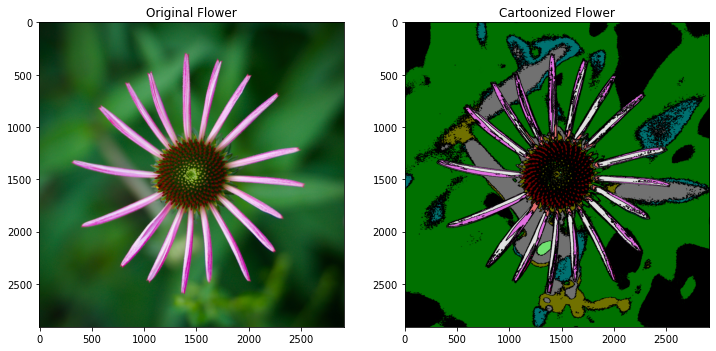

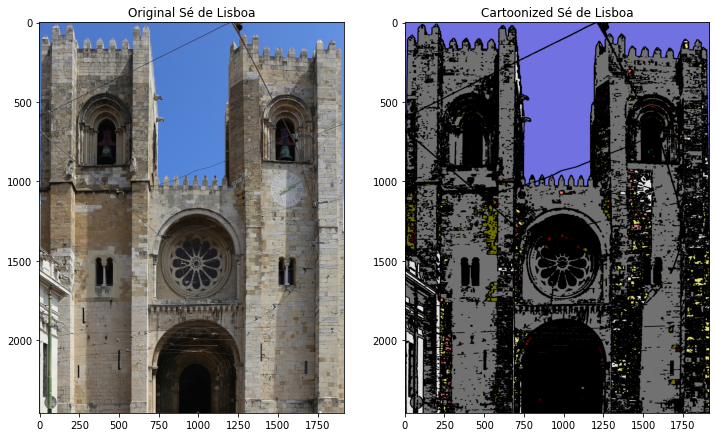

In [25]:
# Function: Cartoonify a provided image
def cartoonify(img):
    
    hl_constant = 100 # Highlighted constant - will be useful in the final merge
    
    # Perform image "blur" to obtain uniform colors - to allow easier edge detection
    # Rounding color values allows them to be uniformed, reducing their variance
    cart_img = np.float32((np.round(img*2.25/255)*(255/2.25))).astype(np.uint8) # Normalize and save integers as valid inputs for cv2.Canny(), 8-bit
    
    # Create the outline mask, by detecting the edges that separate colors
    img_edges = cv2.Canny(cart_img, 75, 500) # Establish edges
    img_edges = cv2.blur(img_edges, (7,3)) # Reduce the image's noise - blur edges before recoloring them
    
    # Merge the blurred image (cart_img) with the mask (img_edges)
    img_edges[img_edges>0] = hl_constant # Any detected edge becomes enhanced/highlighted, so they can be turned black next
    cart_img[img_edges==hl_constant] = 0 # Turn all highlighted edges black
    
    return cart_img

# Add a second image to cartoonize, to check if it performs well on a more complex image
fx_img2 = cv2.imread('personal_imgs/se_lisboa.jpg')
rgb_fx_img2 = cv2.cvtColor(fx_img2, cv2.COLOR_BGR2RGB)

# Perform cartoonization
cart_fx_img = cartoonify(rgb_fx_img)
cart_fx_img2 = cartoonify(rgb_fx_img2)

# Display images
build_plot(rgb_fx_img, "Original Flower", cart_fx_img, "Cartoonized Flower")
build_plot(rgb_fx_img2, "Original Sé de Lisboa", cart_fx_img2, "Cartoonized Sé de Lisboa")

### Task 4 - Frequency Domain Properties

##### 1. Apply Translation + Calculate corresponding 2D FFT + FT Magnitudes

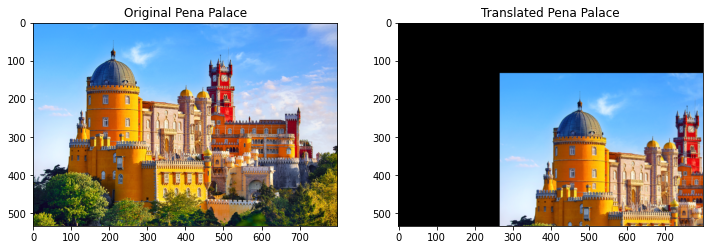

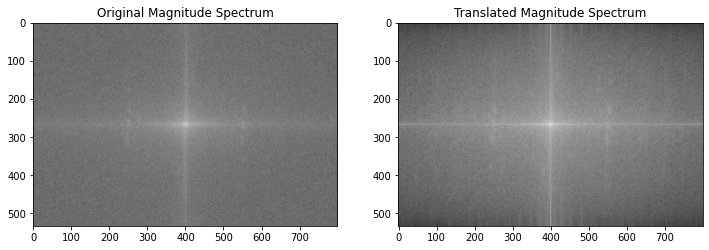

In [26]:
# Function: Apply image translation - using OpenCV's built-in function warpAffine()
def translate(img):
    new_img = np.float32(img)/255 # Normalize source image
    # Build normalized translation matrix - in this case, a third of the image's width horizontally AND a fourth of its height vertically 
    trs_matrix = np.float32([[1, 0, new_img.shape[1]/3], 
                             [0, 1, new_img.shape[0]/4]]) 
    
    new_img = cv2.warpAffine(new_img, trs_matrix, (new_img.shape[1], new_img.shape[0]))
    
    return new_img

# Function: Calculate 2D FFT of an image - using np's fft.* library
def calc_2D_FFT(img):
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # In order to work in 2D, a grayscale conversion is recommended
    new_img = np.float32(new_img)/255 # Normalize source image
    
    # Fast Fourier Transform
    new_img = np.fft.ifftshift(new_img)
    new_img = np.fft.fft2(new_img)
    new_img = np.fft.fftshift(new_img)
    
    # Get the magnitude spectrum from the fft
    magn = np.log(np.abs(new_img)) # Preparing the transformation in a logarithmic format helps with interpreting the spectrum

    return magn

# Load image and make required conversion for visualization
pena_img = cv2.imread('personal_imgs/pena.png')
rgb_pena_img = cv2.cvtColor(pena_img, cv2.COLOR_BGR2RGB)
 
# Translate image   
trs_pena_img = translate(rgb_pena_img)

# Calculate 2D FFT of translated image
rgb_magn = calc_2D_FFT(rgb_pena_img)
trs_magn = calc_2D_FFT(trs_pena_img)
    
# Display images
build_plot(rgb_pena_img, "Original Pena Palace", trs_pena_img, "Translated Pena Palace")   

# Display FT magnitude spectrums (in grayscale, to notice differences more easily)
build_gs_plot(rgb_magn, "Original Magnitude Spectrum", trs_magn, "Translated Magnitude Spectrum")   

We can observe some differences from the two magnitude spectrums. **Without** immediately giving meaning to them, it is possible to verify that the **translated image** results in a more intense spectrum, when compared with the **original** spectrum, since it contains much more noticeable central lines and top/bottom ones appearing. 

The **central-most point** represents the **average** of the colors that are present in an image (in a 0-255 scale). An important conclusion we can obtain from these spectrums is that, given the **geometric** nature of the image, i.e. the presence of sharp delimitations, results in energy that is prevalent in **higher frequencies**, away from the low-frequency zone in the center. That is why it is not immediate to notice the usual circular shape of the central circle, since energies spread out. Having this in mind, the difference between the images becomes clearer. 

The **translated image** reduced the smooth features of the image (e.g., the trees), which was accentuated by the translation itself. This resulted in an even more intense spread that what is seen on the original spectrum. Strong energy surges occur all over the spectrum, with the perceptible lines at the top and bottom. Even more so, we can notice a **diagonal line** (approx. 11π/6 rad) across the central dot. This is due to the strong straight line produced by the translation, originating the diagonality.

### Task 5 - Periodic Noise Removal

##### 1. Add Periodic Noise to Image

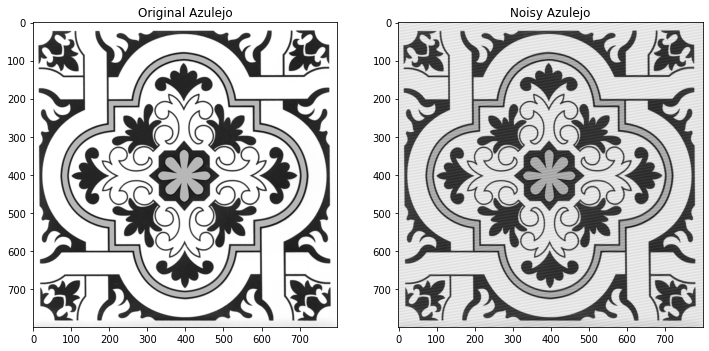

In [37]:
# Function: Add periodic noise to an image
def add_periodic_noise(img):
    
    new_img = img.copy()
    ns = np.zeros((new_img.shape[0], new_img.shape[1])) # Create the noise matrix (to fill and add later)

    # Create the grid to contain the noisy image
    x, y = np.meshgrid(range(0, new_img.shape[0]), range(0, new_img.shape[1])) 

    # Build the (sin) periodic noise -> Amplitude = 30, Per. Factor = 1, Horizontal Shift = 10, Vertical Shift = 0
    ns += 30*np.sin((x*25 + y*33) + 10)

    # Add noise to source image
    ns_img = np.add(ns, new_img)
    
    return ns_img

# Function: Add diagonal overlapping effect as noise to an image (based on Moiré approach)
# NOTE: This type of noise adding method ended up not being used 
def add_overlapping_noise(img):
    
    new_img = img.copy()
    ns_img = img.copy()

    # Helpful values for the noise generation - transformation (angle) values and axis distances
    cos, sin = np.cos(np.pi/4), np.sin(np.pi/4)
    dx, dy = 50*cos, 50*sin
    
    for x in range(0, new_img.shape[0], 2):
        for y in range(0, new_img.shape[1], 2):
            # Computes coordinates to transform -> values are converted to int since they'll be used in the indices
            x2 = np.round(dx + np.round(x*cos-y*sin)).astype(int)
            y2 = np.round(dy + np.round(x*sin+y*cos)).astype(int)
            # Adjust outside-image values (for x)
            if x2 < 0:
                x2 = x2+new_img.shape[0]
            elif x2 >= new_img.shape[0]:
                x2 = x2-new_img.shape[0]    
            # (for y)    
            if y2 < 0:
                y2 = y2+new_img.shape[1]
            elif y2 >= new_img.shape[1]:
                y2 = y2-new_img.shape[1]
                
            # Adds transformed noise
            ns_img[x, y] = new_img[x2, y2]
            
    return ns_img

# Load image and make required conversion for visualization
src_img = cv2.imread('personal_imgs/azulejo.png')
gray_src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2GRAY) # Turn into grayscale to work in (:,:,0)

# Add periodic noise
#ns_src_img = add_overlapping_noise(gray_src_img)
ns_src_img = add_periodic_noise(gray_src_img)

# Display images
build_gs_plot(gray_src_img, "Original Azulejo", ns_src_img, "Noisy Azulejo") 

##### 2. Calculate corresponding 2D FFT + Power Spectrum

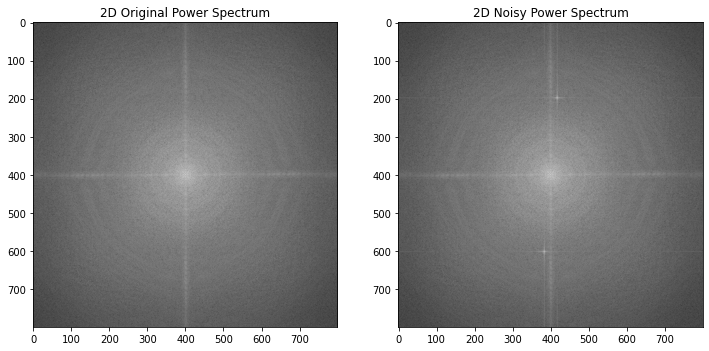

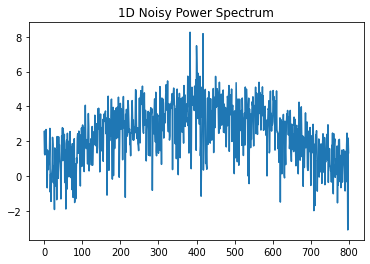

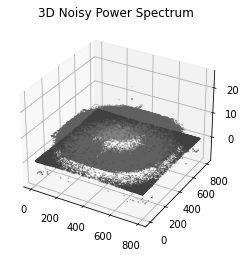

In [38]:
# Function: Calculate 2D (FFT) of an image - adaptation from above, to use when images are already in grayscale
def calc_power(img):
    new_img = np.float32(img)/255 # Normalize source image
    
    # Fast Fourier Transform
    new_img = np.fft.ifftshift(new_img)
    new_img = np.fft.fft2(new_img)
    new_img = np.fft.fftshift(new_img)
    
    # Preparing the transformation in a logarithmic format helps with interpreting the final spectrum
    magn = np.abs(new_img)
    power = np.log(magn**2) # Square the magnitude to obtain the power spectrum

    return power    

# 2D Power Spectrum(s)
src_2d_pwr = calc_power(gray_src_img)
ns_src_2d_pwr = calc_power(ns_src_img)

# Display 2D FT Power Spectrums (in grayscale, to notice differences more easily)
build_gs_plot(src_2d_pwr, "2D Original Power Spectrum", ns_src_2d_pwr, "2D Noisy Power Spectrum")   
    
# Display 1D FT Power Spectrum
ns_src_1d_pwr = plt.figure()
plt.plot(ns_src_2d_pwr[1,:]) # Display the 1D y-vector of the noisy image
plt.title("1D Noisy Power Spectrum")

# Display 3D FT Power Spectrum
ns_src_3d_pwr = plt.figure()
# Create the x and y axes from the image's dimensions, to be at the base of the 3D projection
x, y = np.meshgrid(range(0, gray_src_img.shape[0]), range(0, gray_src_img.shape[1])) 
ax_3d = plt.axes(projection='3d')
ax_3d.contour3D(x, y, ns_src_2d_pwr, cmap='gray')
ax_3d.set_title("3D Noisy Power Spectrum")
plt.show() # So labels stay hidden

All these spectra reveal, in different dimensions, the significant **concentration of energy** that the noise brought up, on certain areas. This translates into more **noticeable frequency limits** which the image affects on. 

For instance, the intensity on the **central dot** allows us to conclude that low-frequency features were introduced. Now, the noise itself resorts to higher frequency formats, as we will see in the next paragraph, but it is indeed true that 'shifts' between the color of the noise and the already existing colors were reduced. Therefore, the transitions appear smoother in relation to before. However, this is not the full story, since the opposite occurs on other instances:

The nature of the noise is understandable by analyzing the two dots edging the newly produced **vertical lines**. What this means is that some of the smoothness of the image was lost, since the straight line-type of the added noise resulted in more energy accumulation on higher frequencies, as well.

##### 3. Remove Periodic Noise from Image

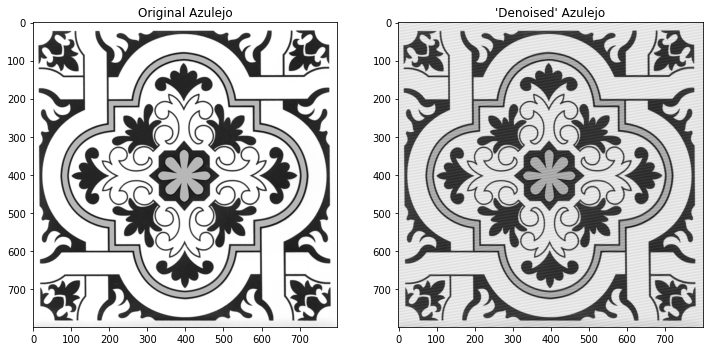

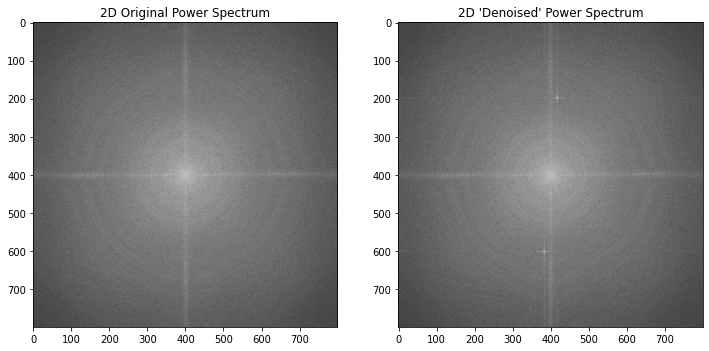

In [50]:
from scipy import fftpack

# Function: Remove periodic noise from an image (frequency domain filtering)
def rem_periodic_noise(img):
    
    new_img = img.copy()
    
    # Isolate the 2 points that surged in the power spectrum, derived from the noise addition (using assistant lines)
    power_peaks = [[382,600],[416,197]]
    
    # Delete the power peaks from the spectrum
    power = calc_power(new_img)
    power[power_peaks[0][0], power_peaks[0][1]] = 0
    power[power_peaks[1][0], power_peaks[1][1]] = 0
                  
    # Find and remove noise from original image  
    ns_to_remove = np.zeros((new_img.shape[0], new_img.shape[1]))
    x, y = np.meshgrid(range(0, new_img.shape[0]), range(0, new_img.shape[1]))
    
    ns_to_remove += 30*np.sin((x*25 + y*33) + 10)
    
    dns_img = np.subtract(new_img, ns_to_remove)
    
    return dns_img

# Remove noise (dns -> 'denoised')
dns_src_img = rem_periodic_noise(ns_src_img)

# 2D Power Spectrum of newly noise-removed image
dns_src_2d_pwr = calc_power(dns_src_img)

# Display images
build_gs_plot(gray_src_img, "Original Azulejo", dns_src_img, "'Denoised' Azulejo") 

# Display 2D FT Power Spectrums
build_gs_plot(src_2d_pwr, "2D Original Power Spectrum", dns_src_2d_pwr, "2D 'Denoised' Power Spectrum")  

This **noise removal** method looks to delete the frequency dots that insurged when noise was added to the original image. By localizing and removing them, an inverse FFT can be run to obtain our 'denoised' image.

As a final analysis, let us observe the power spectrum of the noise-removed image. It's doable to assert that the differences between the original image and the noise-removed one are less detectable now. There is a proximity between them, which had not been present in the previous power spectra comparison.

Even though the removal was not completely able to restore the original image, it performed well enough to make the power spectra almost non-enlightening at all.